In [2]:
import tensorflow as tf
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

Tensorflow Version:  2.4.1
Keras Version:  2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
!pip list | grep torch

torch                         1.6.0+cu101
torchvision                   0.7.0+cu101
You should consider upgrading via the '/home/lkk/Developer/venv38/bin/python -m pip install --upgrade pip' command.


In [4]:
!/home/lkk/Developer/venv38/bin/python -m pip install --upgrade pip

     |████████████████████████████████| 1.5 MB 11.9 MB/s eta 0:00:01
  Attempting uninstall: pip
    Found existing installation: pip 20.3.3
    Uninstalling pip-20.3.3:
      Successfully uninstalled pip-20.3.3


In [5]:
!pip list | grep waymo-open-dataset

In [6]:
!pip install waymo-open-dataset-tf-2-3-0

     |████████████████████████████████| 3.1 MB 6.1 MB/s eta 0:00:01
     |████████████████████████████████| 320.5 MB 3.1 kB/s  eta 0:00:01    |███▊                            | 37.0 MB 12.2 MB/s eta 0:00:24     |██████████                      | 99.6 MB 12.2 MB/s eta 0:00:19
     |████████████████████████████████| 26.0 MB 10.9 MB/s eta 0:00:01
  Using cached numpy-1.18.5-cp38-cp38-manylinux1_x86_64.whl (20.6 MB)
  Using cached tensorflow_estimator-2.3.0-py2.py3-none-any.whl (459 kB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.4.0
    Uninstalling tensorflow-estimator-2.4.0:
      Successfully uninstalled tensorflow-estimator-2.4.0
  Attempting uninstall: scipy
    Found existing installation: scipy 1.5.2
    Uninstalling scipy-1.5.2:
      Successfully uninstalled scipy-1.5.2
ERROR

# Restart the runtime

In [6]:
import tensorflow as tf
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

Tensorflow Version:  2.3.0
Keras Version:  2.4.0
[]


In [4]:
!pip list | grep waymo-open-dataset

waymo-open-dataset-tf-2-3-0   1.3.0


In [5]:
!pip list | grep tensorflow

tensorflow                    2.4.0
tensorflow-datasets           4.2.0
tensorflow-estimator          2.3.0
tensorflow-examples           21c3b9566659dcec2b3f0d36d153cfcc4c846745-
tensorflow-gpu                2.3.0
tensorflow-metadata           0.26.0


# Restart the runtime

In [3]:
!pip list | grep tensorflow

tensorflow                    2.4.1
tensorflow-datasets           4.2.0
tensorflow-estimator          2.4.0
tensorflow-examples           21c3b9566659dcec2b3f0d36d153cfcc4c846745-
tensorflow-metadata           0.26.0


In [4]:
import tensorflow as tf
print("Tensorflow Version: ", tf.__version__)
print("Keras Version: ", tf.keras.__version__)
#check GPU
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print(physical_devices)

Tensorflow Version:  2.4.1
Keras Version:  2.4.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'), PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]


In [5]:
import os
import tensorflow.compat.v1 as tf
import math
import numpy as np
import itertools

tf.enable_eager_execution()

from waymo_open_dataset.utils import range_image_utils
from waymo_open_dataset.utils import transform_utils
from waymo_open_dataset.utils import  frame_utils
from waymo_open_dataset import dataset_pb2 as open_dataset

In [107]:
!ls /DataDisk1/WaymoDataset

LICENSE		   training_0007      training_0015.tar  training_0027.tar
testing_0002	   training_0007.tar  training_0016.tar  training_0028.tar
training_0000	   training_0008      training_0017.tar  training_0029.tar
training_0001	   training_0008.tar  training_0018.tar  training_0030.tar
training_0002	   training_0009      training_0019.tar  training_0031.tar
training_0003	   training_0009.tar  training_0020.tar  validation_0000
training_0004	   training_0010      training_0021.tar  validation_0001
training_0004.tar  training_0010.tar  training_0022.tar  validation_0002
training_0005	   training_0011.tar  training_0023.tar  validation_0003
training_0005.tar  training_0012.tar  training_0024.tar  validation_0003.tar
training_0006	   training_0013.tar  training_0025.tar
training_0006.tar  training_0014.tar  training_0026.tar


In [9]:
!ls /DataDisk1/WaymoDataset/training_0000

segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord
segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord
segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord
segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord
segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord
segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord
segment-10075870402459732738_1060_000_1080_000_with_camera_labels.tfrecord
segment-10082223140073588526_6140_000_6160_000_with_camera_labels.tfrecord
segment-10094743350625019937_3420_000_3440_000_with_camera_labels.tfrecord
segment-10096619443888687526_2820_000_2840_000_with_camera_labels.tfrecord
segment-10107710434105775874_760_000_780_000_with_camera_labels.tfrecord
segment-10153695247769592104_787_000_807_000_with_camera_labels.tfrecord
segment-10206293520369375008_2796_800_2816_800_with_camera_labels.tfrecord
segment-10212406498497081993_5

In [98]:
!pwd

/home/lkk/Developer/2DObject


In [100]:
str(img_path)

'4/000197.png'

In [101]:
img.shape

(886, 1920, 3)

In [103]:
cv2.imwrite('1/testimag.png', img)

False

In [108]:
import cv2
import os
FILENAME = '/DataDisk1/WaymoDataset/training_0000/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord'
dataset = tf.data.TFRecordDataset(FILENAME, compression_type='')
frames=[]
count=0
file_idx=0
for frame_idx, data in enumerate(dataset):
    print("frame_idx:", frame_idx)
    
    frame = open_dataset.Frame()#dataset_pb2.Frame()
    frame.ParseFromString(bytearray(data.numpy()))
    frames.append(frame)
    for img in frame.images:
        count=count+1
        foldername=f'opencv{str(img.name - 1)}/'
        img_path = foldername + \
            f'{str(file_idx).zfill(3)}' + \
            f'{str(frame_idx).zfill(3)}.png'
        if not os.path.exists(foldername):
            os.makedirs(foldername)
        image = tf.image.decode_jpeg(img.image).numpy()
        cv2.imwrite(str(img_path), cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
        #img = mmcv.imfrombytes(img.image)
        #mmcv.imwrite(img, img_path)
        #print("image count:", count)


frame_idx: 0
frame_idx: 1
frame_idx: 2
frame_idx: 3
frame_idx: 4
frame_idx: 5
frame_idx: 6
frame_idx: 7
frame_idx: 8
frame_idx: 9
frame_idx: 10
frame_idx: 11
frame_idx: 12
frame_idx: 13
frame_idx: 14
frame_idx: 15
frame_idx: 16
frame_idx: 17
frame_idx: 18
frame_idx: 19
frame_idx: 20
frame_idx: 21
frame_idx: 22
frame_idx: 23
frame_idx: 24
frame_idx: 25
frame_idx: 26
frame_idx: 27
frame_idx: 28
frame_idx: 29
frame_idx: 30
frame_idx: 31
frame_idx: 32
frame_idx: 33
frame_idx: 34
frame_idx: 35
frame_idx: 36
frame_idx: 37
frame_idx: 38
frame_idx: 39
frame_idx: 40
frame_idx: 41
frame_idx: 42
frame_idx: 43
frame_idx: 44
frame_idx: 45
frame_idx: 46
frame_idx: 47
frame_idx: 48
frame_idx: 49
frame_idx: 50
frame_idx: 51
frame_idx: 52
frame_idx: 53
frame_idx: 54
frame_idx: 55
frame_idx: 56
frame_idx: 57
frame_idx: 58
frame_idx: 59
frame_idx: 60
frame_idx: 61
frame_idx: 62
frame_idx: 63
frame_idx: 64
frame_idx: 65
frame_idx: 66
frame_idx: 67
frame_idx: 68
frame_idx: 69
frame_idx: 70
frame_idx: 71
fr

# Visualize Camera Images and Camera Labels

In [11]:
objecttype_list = [
            'UNKNOWN', 'VEHICLE', 'PEDESTRIAN', 'SIGN', 'CYCLIST'
        ]

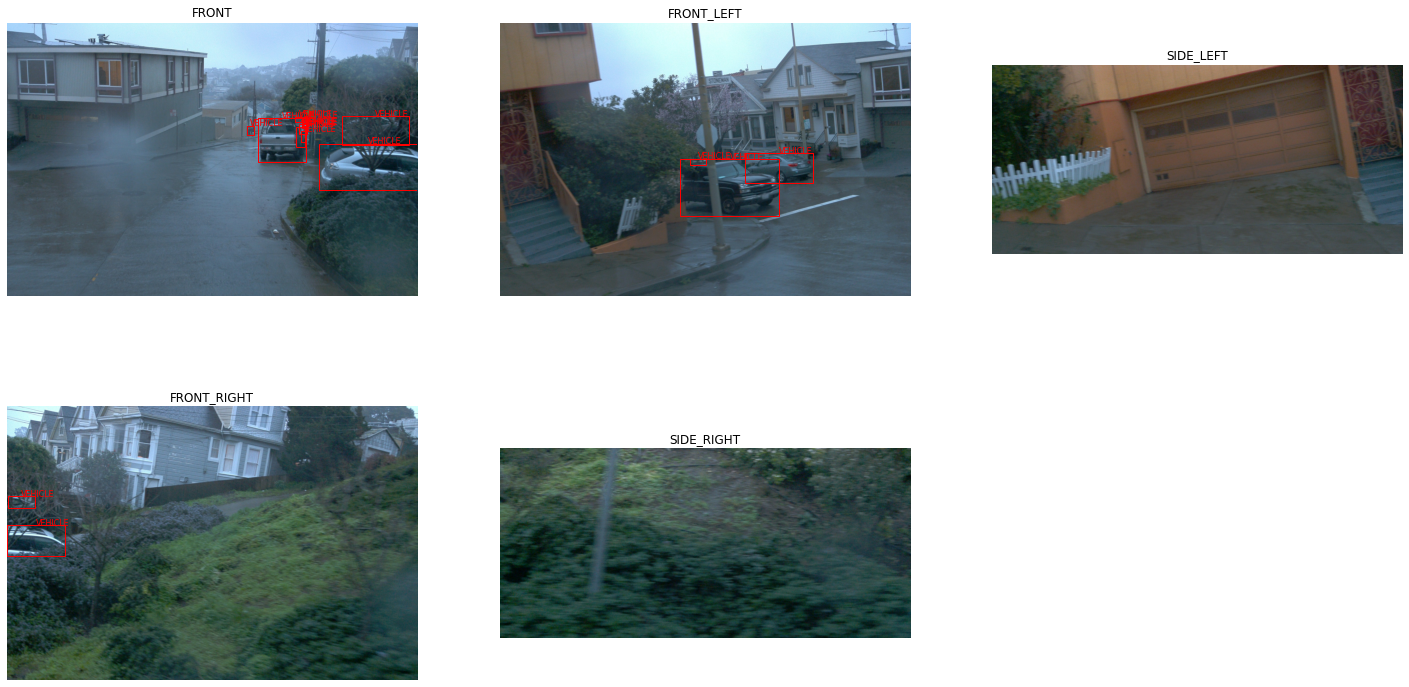

In [12]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline

INSTANCE_Color = {
    'UNKNOWN':'black', 'VEHICLE':'red', 'PEDESTRIAN':'green', 'SIGN': 'yellow', 'CYCLIST':'purple'
}#'Unknown', 'Vehicles', 'Pedestrians', 'Cyclists'

def show_camera_image(camera_image, camera_labels, layout, cmap=None):
    """Show a camera image and the given camera labels."""

    ax = plt.subplot(*layout)

    # Draw the camera labels.
    for camera_label in camera_labels: #frame.camera_labels:
        #print(camera_labels)
        # Ignore camera labels that do not correspond to this camera.
        if camera_label.name != camera_image.name:
            continue

        # Iterate over the individual labels.
        for label in camera_label.labels:
            #print(label.type) #1 for vehicle
            objectclass=objecttype_list[label.type]
            colorlabel=INSTANCE_Color[objectclass]
            #print(label.id) #1fa40b66-1897-4d0b-93e9-a9445372962b
            xmin=label.box.center_x - 0.5 * label.box.length
            ymin=label.box.center_y - 0.5 * label.box.width
            # Draw the object bounding box.
            ax.add_patch(patches.Rectangle(
                xy=(xmin,ymin),
                width=label.box.length,
                height=label.box.width,
                linewidth=1,
                edgecolor=colorlabel,
                facecolor='none'))
            ax.text(label.box.center_x, ymin, objectclass, color=colorlabel, fontsize=8)

    # Show the camera image.
    plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
    plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
    plt.grid(False)
    plt.axis('off')


plt.figure(figsize=(25, 20))
currentframe = frames[10]
for index, image in enumerate(currentframe.images):#each frame has 5 images
    show_camera_image(image, currentframe.camera_labels, [3, 3, index+1])

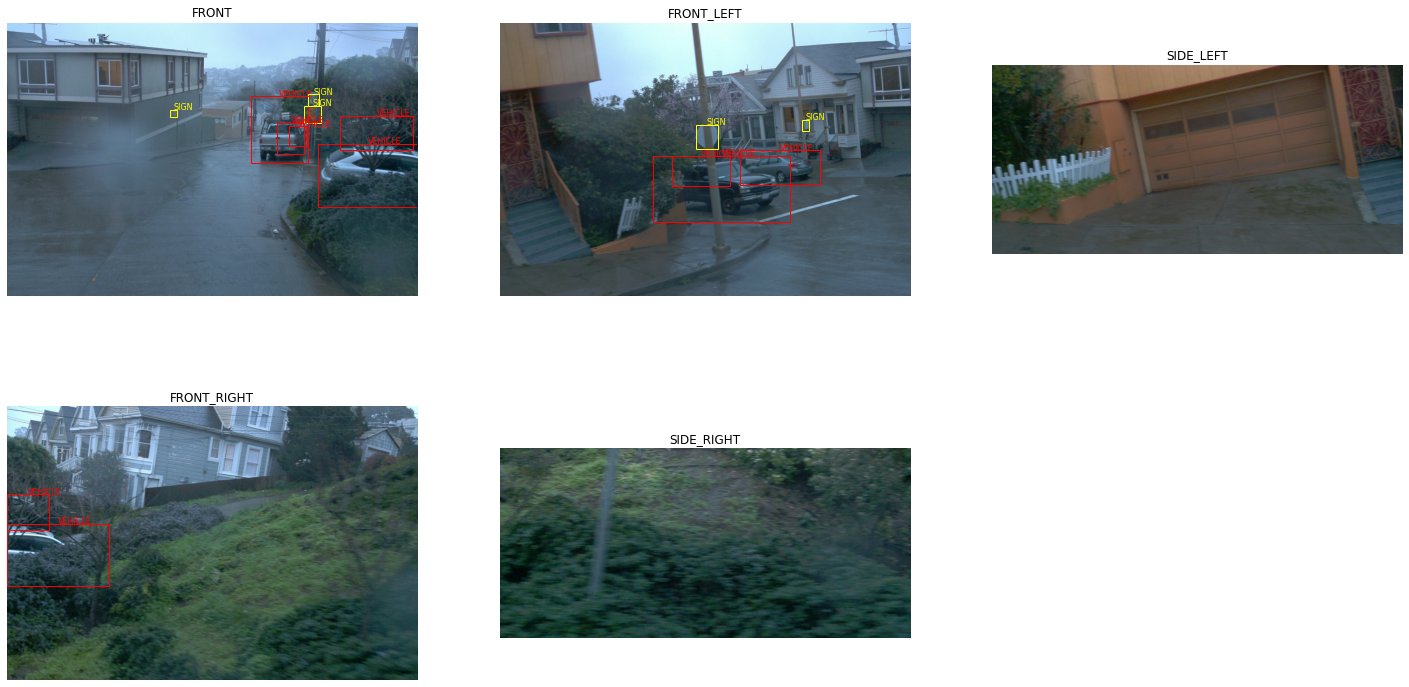

In [26]:
def show_camera_image_lidar2dlabel(camera_image, camera_labels, layout, cmap=None):
    """Show a camera image and the given camera labels."""

    ax = plt.subplot(*layout)

    # Draw the camera labels.
    for camera_label in camera_labels: #frame.camera_labels:
        #print(camera_labels)
        # Ignore camera labels that do not correspond to this camera.
        if camera_label.name != camera_image.name:
            continue

        # Iterate over the individual labels.
        for label in camera_label.labels:
            #print(label)
            #print(label.type) #1 for vehicle
            objectclass=objecttype_list[label.type]
            colorlabel=INSTANCE_Color[objectclass]
            #print(label.id) #1fa40b66-1897-4d0b-93e9-a9445372962b
            xmin=label.box.center_x - 0.5 * label.box.length
            ymin=label.box.center_y - 0.5 * label.box.width
            # Draw the object bounding box.
            ax.add_patch(patches.Rectangle(
                xy=(xmin,ymin),
                width=label.box.length,
                height=label.box.width,
                linewidth=1,
                edgecolor=colorlabel,
                facecolor='none'))
            ax.text(label.box.center_x, ymin, objectclass, color=colorlabel, fontsize=8)

    # Show the camera image.
    plt.imshow(tf.image.decode_jpeg(camera_image.image), cmap=cmap)
    plt.title(open_dataset.CameraName.Name.Name(camera_image.name))
    plt.grid(False)
    plt.axis('off')
    
plt.figure(figsize=(25, 20))
currentframe = frames[10]
for index, image in enumerate(currentframe.images):#each frame has 5 images
    show_camera_image(image, currentframe.projected_lidar_labels, [3, 3, index+1])

In [27]:
currentframe.projected_lidar_labels

[name: FRONT
labels {
  box {
    center_x: 1272.5025936374784
    center_y: 501.55816549449247
    width: 313.0628258087503
    length: 268.4165370842252
  }
  metadata {
    speed_x: -3.552713678800501e-14
    speed_y: 2.8421709430404007e-13
    accel_x: 8.881784197001251e-13
    accel_y: -8.5265128291212e-12
  }
  type: TYPE_VEHICLE
  id: "0QXtLAoMcF26x6k0m-7gVQ_FRONT"
}
labels {
  box {
    center_x: 1325.7591586800909
    center_y: 540.3651187974933
    width: 145.76554003629371
    length: 128.80825463085716
  }
  metadata {
    speed_x: 0.004824087256629639
    speed_y: -0.008780402172305912
    accel_x: 3.394617920093878e-10
    accel_y: -6.181721801112871e-10
  }
  type: TYPE_VEHICLE
  id: "2OtubQ7iaA71QGsDdx-1oA_FRONT"
}
labels {
  box {
    center_x: 1433.5912935551596
    center_y: 361.14719321213056
    width: 55.68123428350617
    length: 49.79440015797786
  }
  metadata {
    speed_x: 0.0019163051748449789
    speed_y: 0.00099735967722836
    accel_x: 1.3589129821411913e

In [74]:
cameraorder={
    0:1, 1:0, 2:3, 3:2, 4:4
}#Front, front_left, side_left, front_right, side_right

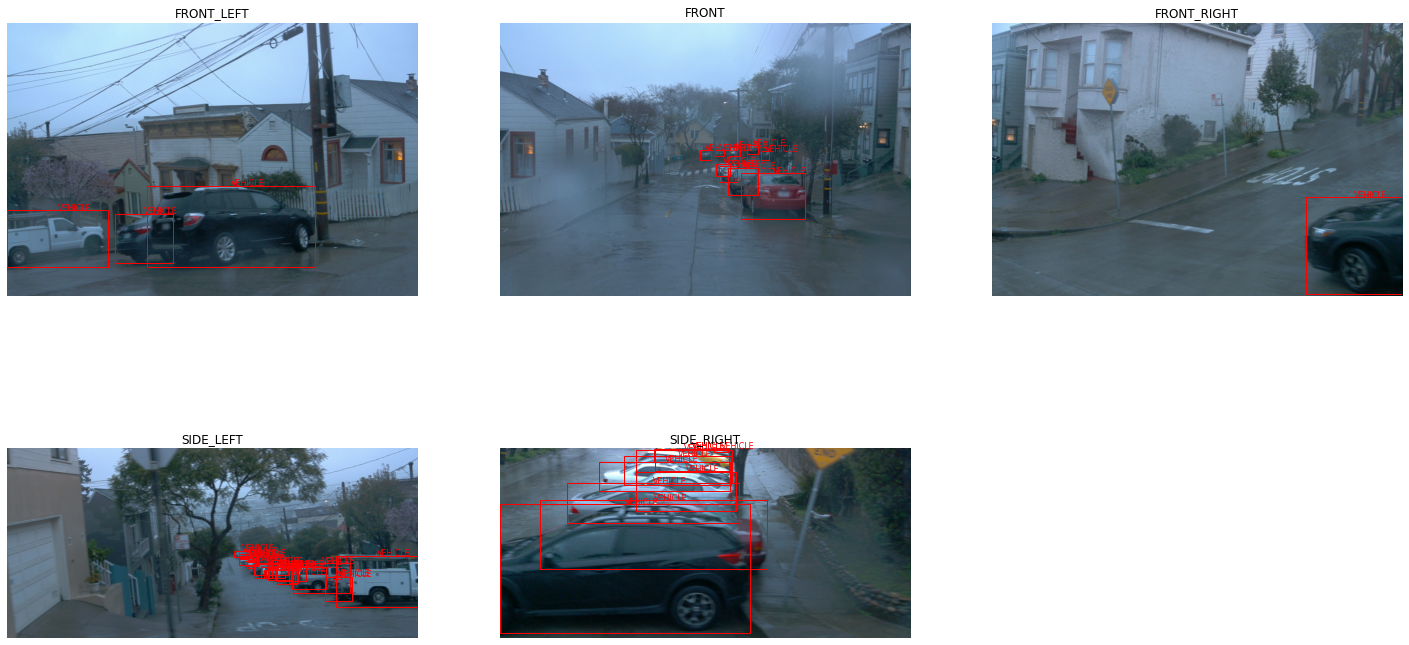

In [79]:
frameindex=150
plt.figure(figsize=(25, 20))
currentframe = frames[frameindex]
for index in range(0,5):#each frame has 5 images
    newindex=cameraorder[index]
    image=currentframe.images[newindex]
    show_camera_image(image, currentframe.camera_labels, [3, 3, index+1])

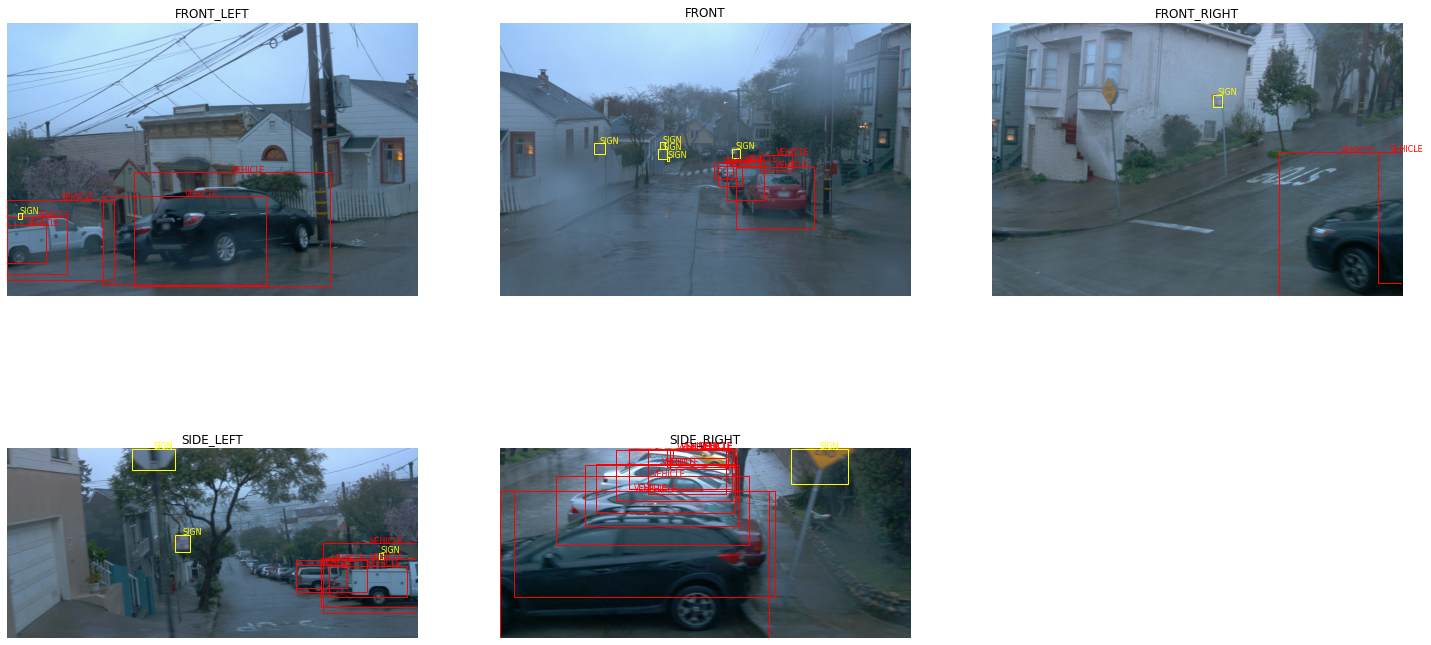

In [80]:
plt.figure(figsize=(25, 20))
#currentframe = frames[frameindex]
for index in range(0,5):#each frame has 5 images
    newindex=cameraorder[index]
    image=currentframe.images[newindex]
    show_camera_image(image, currentframe.projected_lidar_labels, [3, 3, index+1])

# Visualize Lidar

Laser name definition in https://github.com/waymo-research/waymo-open-dataset/blob/master/waymo_open_dataset/dataset.proto
TOP = 1;
    FRONT = 2;
    SIDE_LEFT = 3;
    SIDE_RIGHT = 4;
    REAR = 5;
The dataset contains data from five lidars - one mid-range lidar (top) and four short-range lidars (front, side left, side right, and rear), ref: https://waymo.com/open/data/perception/
The point cloud of each lidar is encoded as a range image. Two range images are provided for each lidar, one for each of the two strongest returns. It has 4 channels:

channel 0: range (see spherical coordinate system definition)
channel 1: lidar intensity
channel 2: lidar elongation
channel 3: is_in_nlz (1 = in, -1 = not in)

In [81]:
(range_images, camera_projections, range_image_top_pose) = frame_utils.parse_range_image_and_camera_projection(currentframe)

ri_index: 0 for the first return, 1 for the second return. https://github.com/waymo-research/waymo-open-dataset/blob/master/waymo_open_dataset/utils/frame_utils.py
keep_polar_features: If true, keep the features from the polar range image
      (i.e. range, intensity, and elongation) as the first features in the
      output range image.
 dict of {laser_name, (H, W, D)} range images in Cartesian coordinates. D
      will be 3 if keep_polar_features is False (x, y, z) and 6 if
      keep_polar_features is True (range, intensity, elongation, x, y, z).
 
 Global frame
The origin of this frame is set to the vehicle position when the vehicle starts. It is an ‘East-North-Up’ coordinate frame. ‘Up(z)’ is aligned with the gravity vector, positive upwards. ‘East(x)’ points directly east along the line of latitude. ‘North(y)’ points towards the north pole.

Vehicle frame
The x-axis is positive forwards, y-axis is positive to the left, z-axis is positive upwards. A vehicle pose defines the transform from the vehicle frame to the global frame.

Sensor frames
Each sensor comes with an extrinsic transform that defines the transform from the sensor frame to the vehicle frame.

The camera frame is placed in the center of the camera lens. The x-axis points down the lens barrel out of the lens. The z-axis points up. The y/z plane is parallel to the camera plane. The coordinate system is right handed.

The lidar sensor frame has the z-axis pointing upward with the x/y plane depending on the lidar position.

Lidar Spherical Coordinates
The lidar spherical coordinate system is based on the Cartesian coordinate system in lidar sensor frame. A point (x, y, z) in lidar Cartesian coordinates can be uniquely translated to a (range, azimuth, inclination) tuple in lidar spherical coordinates.

Kitti frame is 
Camera: x = right, y = down, z = forward
• Velodyne: x = forward, y = left, z = up (same to waymo vehicle frame)
• GPS/IMU: x = forward, y = left, z = up

In [82]:
#convert_range_image_to_point_cloud 
points, cp_points = frame_utils.convert_range_image_to_point_cloud(
    currentframe,
    range_images,
    camera_projections,
    range_image_top_pose,
    keep_polar_features=True)
points_ri2, cp_points_ri2 = frame_utils.convert_range_image_to_point_cloud(
    currentframe,
    range_images,
    camera_projections,
    range_image_top_pose,
    ri_index=1,
    keep_polar_features=True)

# 3d points in vehicle frame. 
points_all = np.concatenate(points, axis=0) #combines 5 lidar data together
points_all_ri2 = np.concatenate(points_ri2, axis=0) # combines 5 lidar data together
# camera projection corresponding to each point.
cp_points_all = np.concatenate(cp_points, axis=0)
cp_points_all_ri2 = np.concatenate(cp_points_ri2, axis=0)

In [83]:
len(points)

5

In [53]:
len(points[0])

148552

In [54]:
points[0].shape

(148552, 6)

In [55]:
points[1].shape

(3752, 6)

In [56]:
points[2].shape

(4571, 6)

In [57]:
points[3].shape

(3846, 6)

In [58]:
points[4].shape

(5187, 6)

In [59]:
148552+3752+4571+3846+5187

165908

In [60]:
points_all.shape

(165908, 6)

In [61]:
points_all[1:5,0]

array([51.40972 , 52.13578 , 51.86058 , 51.269196], dtype=float32)

In [62]:
points_all[1:5,1]

array([0.05444336, 0.18359375, 0.20410156, 0.24023438], dtype=float32)

In [63]:
points_all[1:5,2]

array([0.        , 0.67336196, 0.327898  , 0.18151496], dtype=float32)

In [64]:
points_all[1:5,3]

array([-49.69751 , -50.42206 , -50.145935, -50.07489 ], dtype=float32)

In [65]:
points_all[1:5,4]

array([0.2421875 , 0.36914062, 0.49023438, 0.49121094], dtype=float32)

In [66]:
points_all[1:5,5]

array([3.9124756, 3.9368591, 3.9274597, 4.1783752], dtype=float32)

In [84]:
# declare new index list 
i = [3,4,5,1] 
  
# create output 
pointsxyzintensity_output = points_all[:,i] 

In [69]:
pointsxyzintensity_output[1:5,0]

array([-49.69751 , -50.42206 , -50.145935, -50.07489 ], dtype=float32)

In [70]:
pointsxyzintensity_output[1:5,1]

array([0.2421875 , 0.36914062, 0.49023438, 0.49121094], dtype=float32)

In [72]:
pointsxyzintensity_output.shape

(165908, 4)

In [86]:
frameindex

150

In [87]:
file_idx=0
frame_idx=frameindex
pc_path = f'lidarxyzintensityall' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_output.astype(np.float32).tofile(pc_path)

In [88]:
points[0].shape

(142488, 6)

In [90]:
pointsxyzintensity_topoutput = points[0][:,i] 
pc_path = f'lidarxyzintensitytop' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_topoutput.astype(np.float32).tofile(pc_path)

In [91]:
pointsxyzintensity_topoutput = points_all_ri2[:,i] 
pc_path = f'lidarxyzintensityallri2' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_topoutput.astype(np.float32).tofile(pc_path)

In [94]:
pointsxyzintensity_topoutput = points_ri2[0][:,i] 
pc_path = f'lidarxyzintensitytopri2' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_topoutput.astype(np.float32).tofile(pc_path)

Lidar '_FRONT', '_FRONT_RIGHT', '_FRONT_LEFT', '_SIDE_RIGHT',
            '_SIDE_LEFT'

In [92]:
pointsxyzintensity_topoutput = points[1][:,i] 
pc_path = f'lidarxyzintensityleft' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_topoutput.astype(np.float32).tofile(pc_path)

In [95]:
pointsxyzintensity_topoutput = points[2][:,i] 
pc_path = f'lidarxyzintensityright' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
pointsxyzintensity_topoutput.astype(np.float32).tofile(pc_path)

In [31]:
file_idx=0
frame_idx=1
pc_path = f'lidar0' + \
            f'{str(file_idx).zfill(3)}{str(frame_idx).zfill(3)}.bin'
points[0].astype(np.float32).tofile(pc_path)

In [17]:
!pip install open3d

     |████████████████████████████████| 188.5 MB 10.9 MB/s eta 0:00:01    |██████████▉                     | 63.5 MB 12.2 MB/s eta 0:00:11     |███████████████████████▉        | 140.4 MB 15.4 MB/s eta 0:00:04
     |████████████████████████████████| 24.9 MB 12.5 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1316 sha256=44623358160637fb2b2528af7ba647eb58198ed8de98804b50465b3df8756791
  Stored in directory: /home/lkk/.cache/pip/wheels/22/0b/40/fd3f795caaa1fb4c6cb738bc1f56100be1e57da95849bfc897
Successfully built sklearn


In [18]:
import open3d as o3d

In [21]:
import numpy as np
import struct
import sys
def bin_to_pcd(binFileName):
    size_float = 4
    list_pcd = []
    with open(binFileName, "rb") as f:
        byte = f.read(size_float * 4)
        while byte:
            x, y, z, intensity = struct.unpack("ffff", byte)
            list_pcd.append([x, y, z])
            byte = f.read(size_float * 4)
    np_pcd = np.asarray(list_pcd)
    pcd = o3d.geometry.PointCloud()
    pcd.points = o3d.utility.Vector3dVector(np_pcd)
    return pcd

In [23]:
pcd = bin_to_pcd('lidardata000000.bin')
pcdFileName='pcddata.pcd'
o3d.io.write_point_cloud(pcdFileName, pcd)

True

In [109]:
!ls /DataDisk1/WaymoDataset

LICENSE		   training_0007      training_0015.tar  training_0027.tar
testing_0002	   training_0007.tar  training_0016.tar  training_0028.tar
training_0000	   training_0008      training_0017.tar  training_0029.tar
training_0001	   training_0008.tar  training_0018.tar  training_0030.tar
training_0002	   training_0009      training_0019.tar  training_0031.tar
training_0003	   training_0009.tar  training_0020.tar  validation_0000
training_0004	   training_0010      training_0021.tar  validation_0001
training_0004.tar  training_0010.tar  training_0022.tar  validation_0002
training_0005	   training_0011.tar  training_0023.tar  validation_0003
training_0005.tar  training_0012.tar  training_0024.tar  validation_0003.tar
training_0006	   training_0013.tar  training_0025.tar
training_0006.tar  training_0014.tar  training_0026.tar


In [110]:
import Waymo2Kitti

In [116]:
import importlib
import Waymo2Kitti
importlib.reload(Waymo2Kitti)#only used for debug

<module 'Waymo2Kitti' from '/home/lkk/Developer/2DObject/Waymo2Kitti.py'>

In [117]:
from os import path as osp
folders = ['training_0000', 'training_0001']
root_path="/DataDisk1/WaymoDataset"
out_dir="/DataDisk1/WaymoKitti"
workers=4
for i, split in enumerate(folders):
    #load_dir = osp.join(root_path, 'waymo_format', split)
    load_dir = osp.join(root_path, split)
    if split == 'validation':
        save_dir = osp.join(out_dir, 'validation')
    else:
        save_dir = osp.join(out_dir, 'training', split)
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)
    converter = Waymo2Kitti.Waymo2KITTI(
        load_dir,
        save_dir,
        workers=workers,
        test_mode=(split == 'test'))
    converter.convert()

Start converting ...
Current: fileindex: 0
Current path: /DataDisk1/WaymoDataset/training_0000/segment-10017090168044687777_6380_000_6400_000_with_camera_labels.tfrecord
Current: fileindex: 1
Current path: /DataDisk1/WaymoDataset/training_0000/segment-10023947602400723454_1120_000_1140_000_with_camera_labels.tfrecord
Current: fileindex: 2
Current path: /DataDisk1/WaymoDataset/training_0000/segment-1005081002024129653_5313_150_5333_150_with_camera_labels.tfrecord
Current: fileindex: 3
Current path: /DataDisk1/WaymoDataset/training_0000/segment-10061305430875486848_1080_000_1100_000_with_camera_labels.tfrecord
Current: fileindex: 4
Current path: /DataDisk1/WaymoDataset/training_0000/segment-10072140764565668044_4060_000_4080_000_with_camera_labels.tfrecord
Current: fileindex: 5
Current path: /DataDisk1/WaymoDataset/training_0000/segment-10072231702153043603_5725_000_5745_000_with_camera_labels.tfrecord
Current: fileindex: 6
Current path: /DataDisk1/WaymoDataset/training_0000/segment-1007

In [125]:
!ls /DataDisk1/WaymoDataset

LICENSE		   training_0007      training_0015.tar  training_0027.tar
testing_0002	   training_0007.tar  training_0016.tar  training_0028.tar
training_0000	   training_0008      training_0017.tar  training_0029.tar
training_0001	   training_0008.tar  training_0018.tar  training_0030.tar
training_0002	   training_0009      training_0019.tar  training_0031.tar
training_0003	   training_0009.tar  training_0020.tar  validation_0000
training_0004	   training_0010      training_0021.tar  validation_0001
training_0004.tar  training_0010.tar  training_0022.tar  validation_0002
training_0005	   training_0011.tar  training_0023.tar  validation_0003
training_0005.tar  training_0012.tar  training_0024.tar  validation_0003.tar
training_0006	   training_0013.tar  training_0025.tar
training_0006.tar  training_0014.tar  training_0026.tar


In [121]:
!ls /DataDisk1

 295-B-Ji			  'System Volume Information'
'Anticipating Crash dataset'	   TrafficIntersection03212019
 Cancer_classification_mlProject   Vehicle_ReIdentification_VeriDataset
 data_pool			   WaymoDataset
 data_pool2			   WaymoKitti
 Datasets


In [122]:
!ls

0			lidardata000001.bin		   opencv1
1			lidarxyzintensityall000000.bin	   opencv2
2			lidarxyzintensityall000150.bin	   opencv3
3			lidarxyzintensityallri2000150.bin  opencv4
3DDepth			lidarxyzintensityleft000150.bin    pcddata.pcd
3DVisualizeWaymo.ipynb	lidarxyzintensityright000150.bin   __pycache__
4			lidarxyzintensitytop000150.bin	   testimag.png
lidar0000001.bin	lidarxyzintensitytopri2000150.bin  Waymo2Kitti.py
lidarall000000.bin	o3ddrawlidarbin.py		   WaymoStart.ipynb
lidardata000000.bin	opencv0


In [123]:
!ls /DataDisk1/WaymoKitti/

training
